In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arch.univariate import GARCH, ConstantMean, SkewStudent, Normal
from arch import arch_model
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.stats import norm
import seaborn as sns

In [53]:
def seed_dist(i):
    return [i,i+1,i+2,i+3]

In [54]:
def acf_garch(a,b,h):
    # h>=1
    # a: alpha
    # b: beta
    p_1 = a*(1-b*(a+b))/(1-(a+b)**2+a**2) 
    p_h = p_1 *(a+b)**(h-1)
    return p_h

In [55]:
def sim_garch(n,m,a,b,omega):
    # n: numero de series simuladas
    # m: datos de la serie a simular
    # omega : omega
    sim_mod = arch_model(None, p=1, o=0, q=1)
    params = {"mu":0,"omega": omega,"alpha[1]":a,"beta[1]":b}
    param = pd.Series(params)
    np.random.seed(69)
    datos_simulados = []
    for i in range(n):
        seedd = seed_dist(i)
        rs = np.random.RandomState(seedd)
        sim_mod.distribution = Normal(seed=rs)
        sim_data = sim_mod.simulate(param, m) #1000000
        datos_simulados.append(sim_data["data"])
    
    
    acfs = []
    for i in range(n):
        acfs.append(acf(np.square(datos_simulados[i]),nlags = 20))
    
    df = pd.DataFrame(acfs, columns=np.arange(0, 21))
    acf_mean = df.mean()
    acf_teory_1 = []
    acf1 = acf_mean[1:20]
    for i in range(1,20):
        acf_teory_1.append(acf_garch(a,b,i))
    
    return acf1,acf_teory_1
    

### m sera la cantidad de datos por serie y n el numero de trayectorias

In [56]:
x = np.arange(1,20)
alpha = [0.2,0.05,0.8,0.4]
beta = [0.3,0.8,0.05,0.4]
omega = 0.1


#acf1,acft1 = sim_garch(100,100,0.3,0.2,0.1)

## n = 100 y m = 500 

In [103]:
acf_m = []
acf_t = []
n=100
m=500
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)





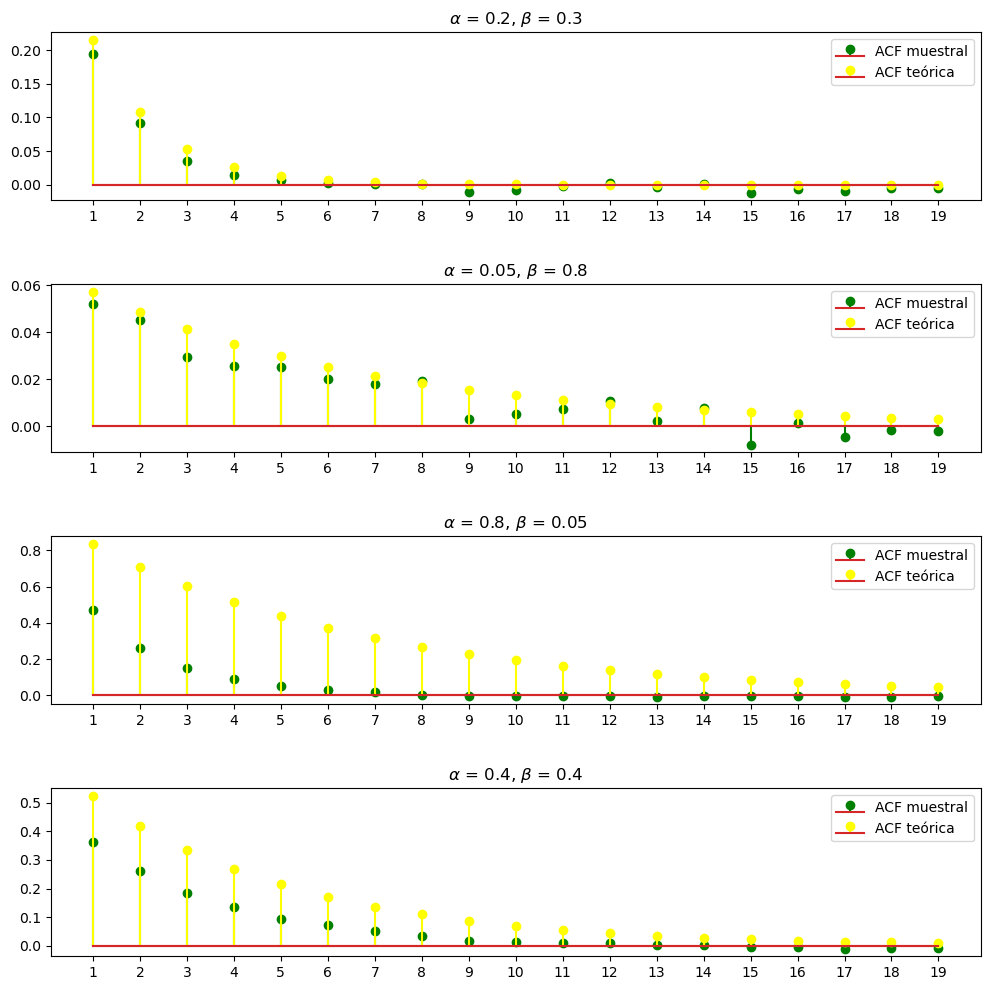

In [104]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

In [105]:
distancias_acf1 = []
for i in range(len(alpha)):
    distancias_acf1.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [106]:
distancias_acf1

[0.04232497799799665,
 0.030732291924066703,
 1.1529516628411134,
 0.3803086324600473]

## n = 1000 y m=500

In [107]:
acf_m = []
acf_t = []
n=1000
m=500
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)


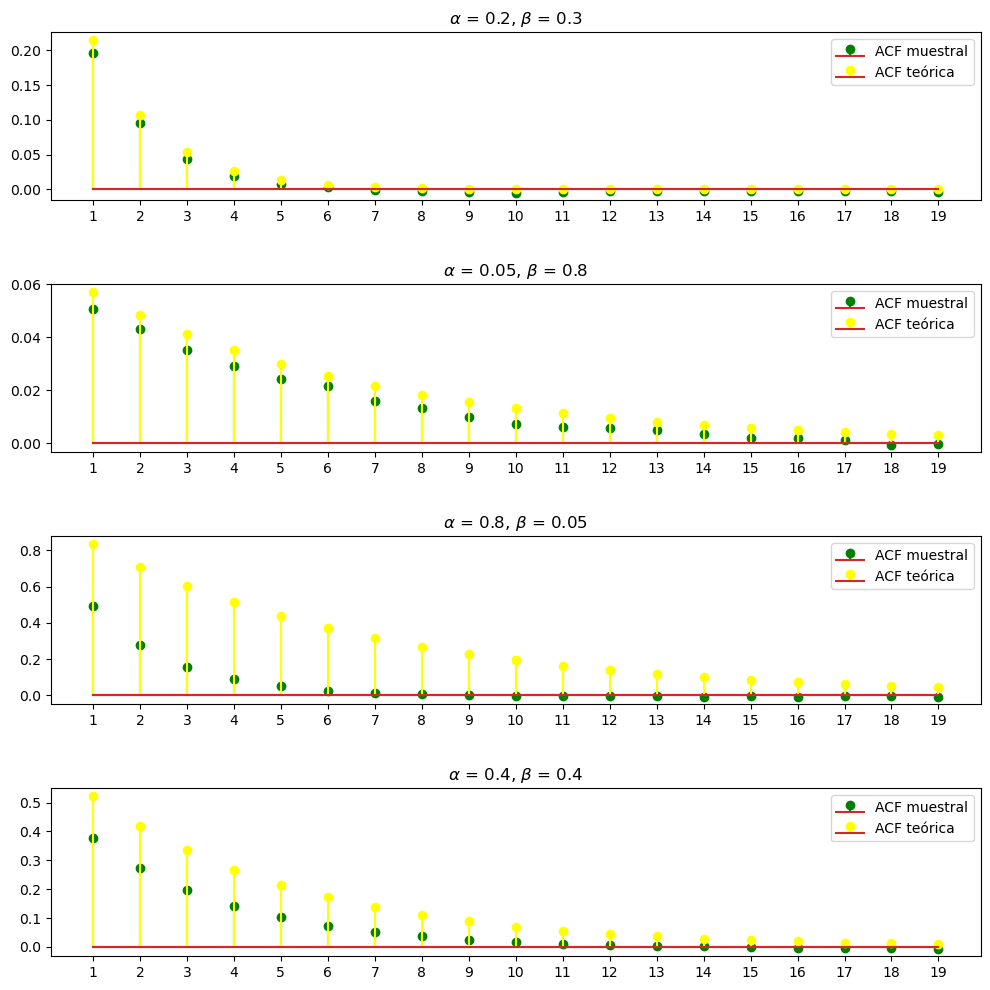

In [108]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

In [109]:
distancias_acf2 = []
for i in range(len(alpha)):
    distancias_acf2.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [110]:
distancias_acf2

[0.030003073464842663,
 0.02115712850320538,
 1.1372553892445485,
 0.3559147731413532]

## n=10000 y m=500

In [111]:
acf_m = []
acf_t = []
n=10000
m=500
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

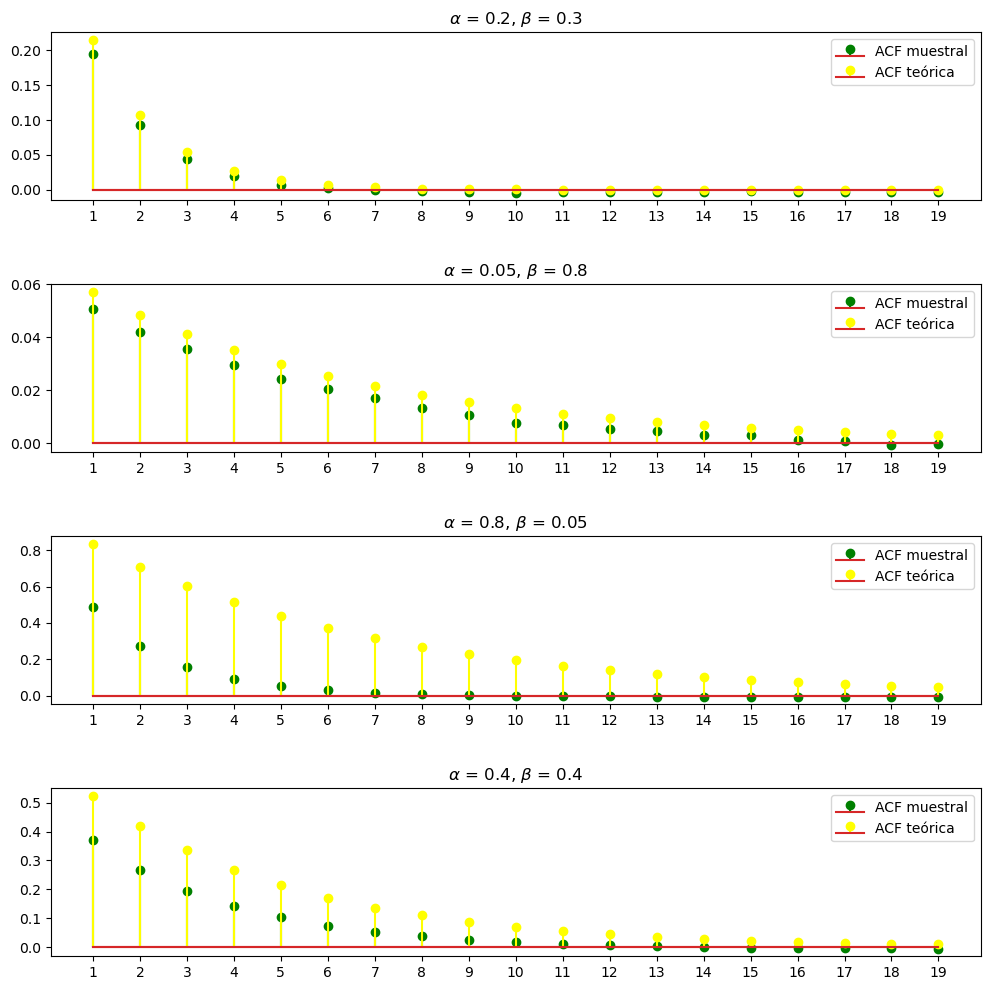

In [112]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

In [113]:
distancias_acf3 = []
for i in range(len(alpha)):
    distancias_acf3.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [114]:
names = ["acf1","acf2","acf3","acf4"]
dist = [distancias_acf1,distancias_acf2,distancias_acf3]
resumen = pd.DataFrame(dist,columns = names)
resumen.index = ["n=100","n=1000","n=10000"]

In [115]:
resumen

,acf1,acf2,acf3,acf4
n=100,0.042325,0.030732,1.152952,0.380309
n=1000,0.030003,0.021157,1.137255,0.355915
n=10000,0.032162,0.020579,1.142564,0.359299


In [118]:
print(resumen.to_latex())

\begin{tabular}{lrrrr}
\toprule
 & acf1 & acf2 & acf3 & acf4 \\
\midrule
n=100 & 0.042325 & 0.030732 & 1.152952 & 0.380309 \\
n=1000 & 0.030003 & 0.021157 & 1.137255 & 0.355915 \\
n=10000 & 0.032162 & 0.020579 & 1.142564 & 0.359299 \\
\bottomrule
\end{tabular}



# N variando y m fijo en 1000

# n= 100 y m =1000

In [119]:
acf_m = []
acf_t = []
n=100
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

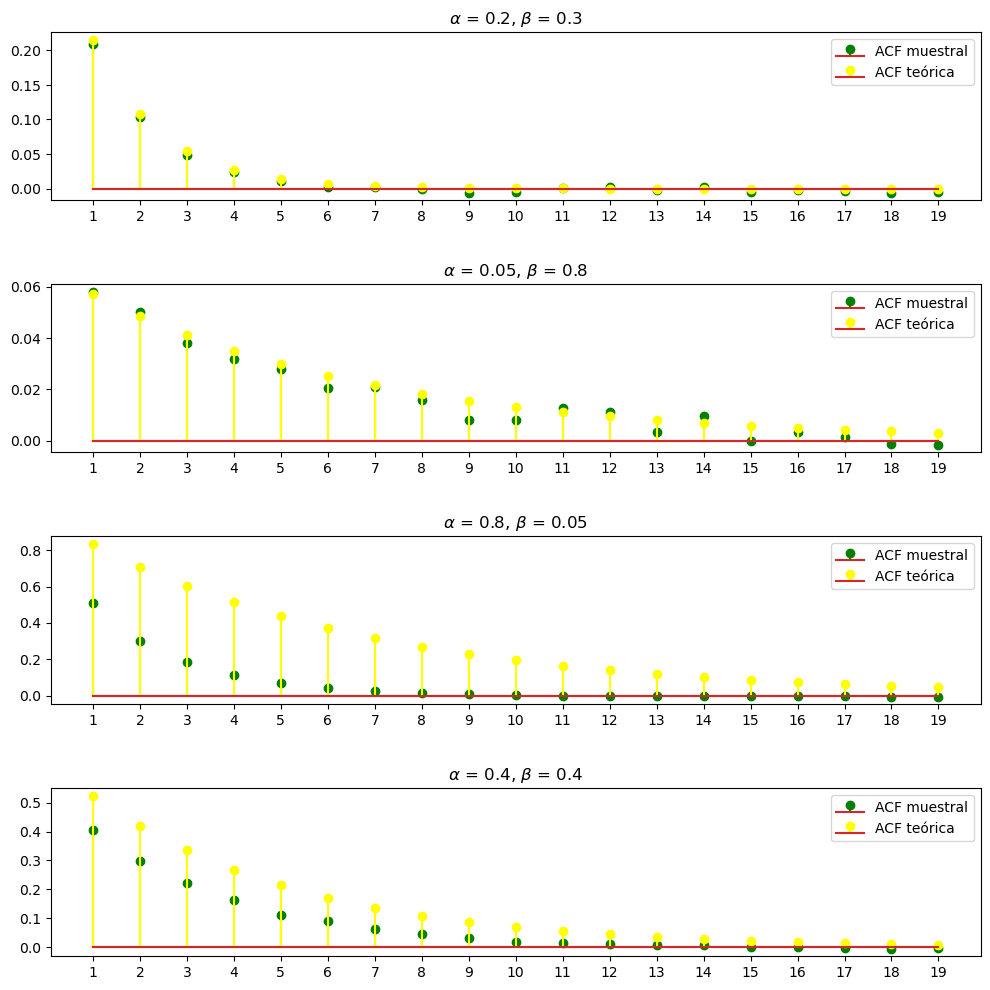

In [120]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

In [121]:
distancias_acf1 = []
for i in range(len(alpha)):
    distancias_acf1.append(np.linalg.norm(acf_m[i]-acf_t[i]))

# n= 1000 y m =1000

In [122]:
acf_m = []
acf_t = []
n=1000
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

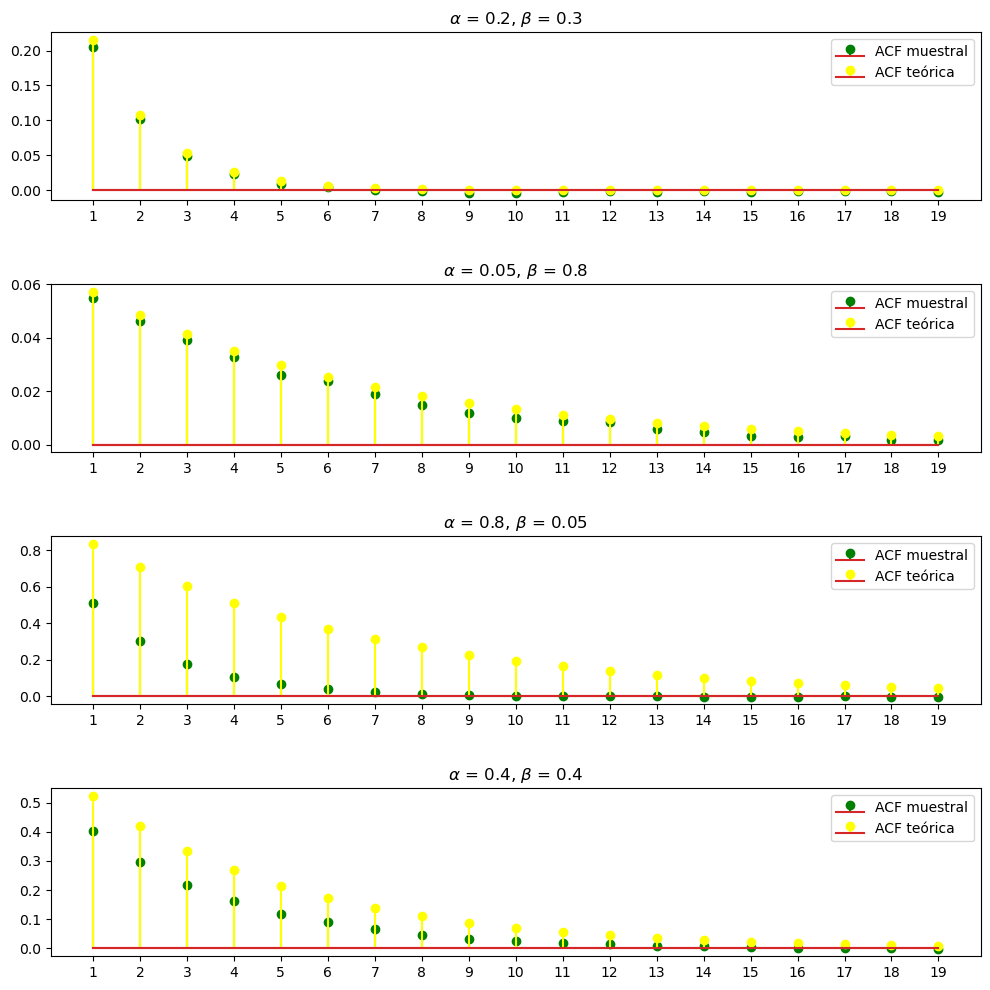

In [123]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

In [124]:
distancias_acf2 = []
for i in range(len(alpha)):
    distancias_acf2.append(np.linalg.norm(acf_m[i]-acf_t[i]))

# n= 10000 y m =1000

In [125]:
acf_m = []
acf_t = []
n=10000
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

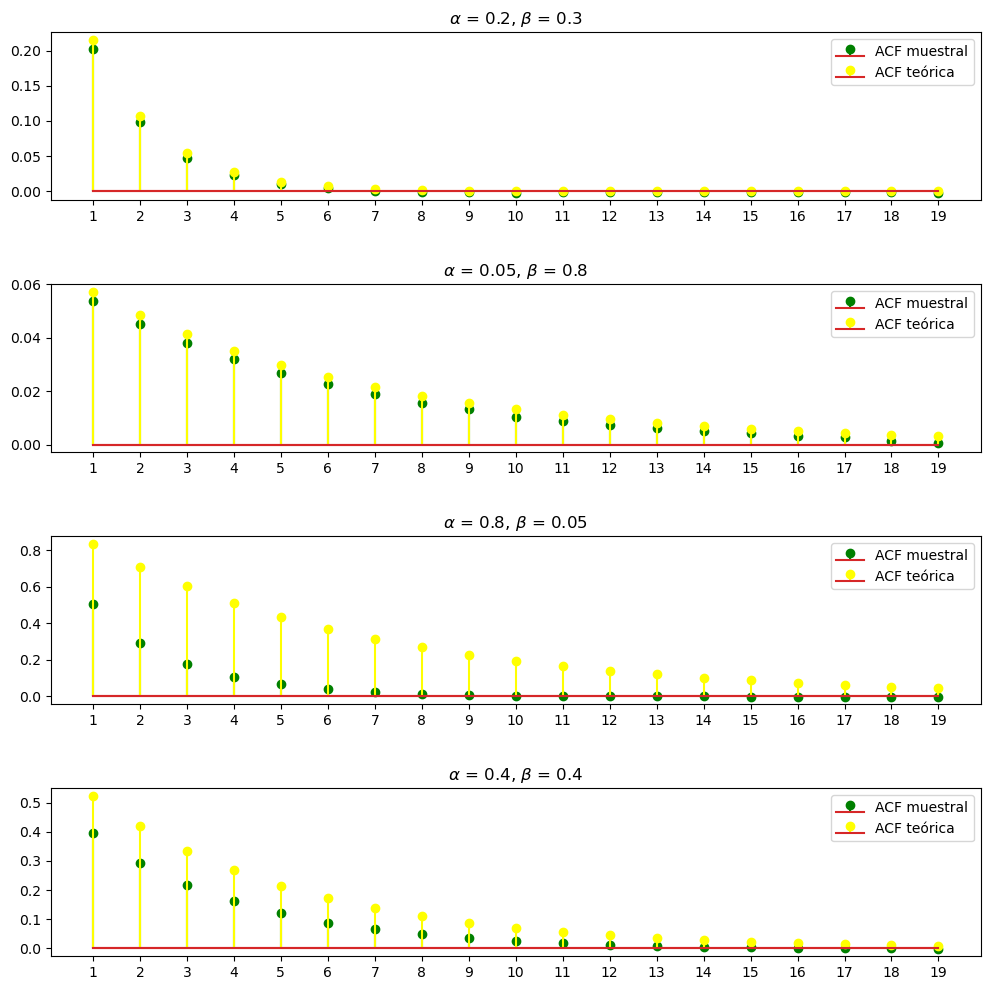

In [126]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

In [127]:
distancias_acf3 = []
for i in range(len(alpha)):
    distancias_acf3.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [128]:
names = ["acf1","acf2","acf3","acf4"]
dist = [distancias_acf1,distancias_acf2,distancias_acf3]
resumen2 = pd.DataFrame(dist,columns = names)
resumen2.index = ["n=100","n=1000","n=10000"]

In [129]:
resumen2

,acf1,acf2,acf3,acf4
n=100,0.018043,0.016528,1.086848,0.299527
n=1000,0.015908,0.010651,1.092014,0.297581
n=10000,0.018738,0.011148,1.098076,0.303254


In [130]:
print(resumen2.to_latex())

\begin{tabular}{lrrrr}
\toprule
 & acf1 & acf2 & acf3 & acf4 \\
\midrule
n=100 & 0.018043 & 0.016528 & 1.086848 & 0.299527 \\
n=1000 & 0.015908 & 0.010651 & 1.092014 & 0.297581 \\
n=10000 & 0.018738 & 0.011148 & 1.098076 & 0.303254 \\
\bottomrule
\end{tabular}



In [132]:
resumen2-resumen

,acf1,acf2,acf3,acf4
n=100,-0.024282,-0.014204,-0.066103,-0.080782
n=1000,-0.014096,-0.010506,-0.045241,-0.058333
n=10000,-0.013424,-0.009431,-0.044488,-0.056045


# Ideas que serguramente no pesquemos

# Aca variamos el m()

## n=1000 y m=100

In [13]:
acf_m = []
acf_t = []
n=1000
m=100
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

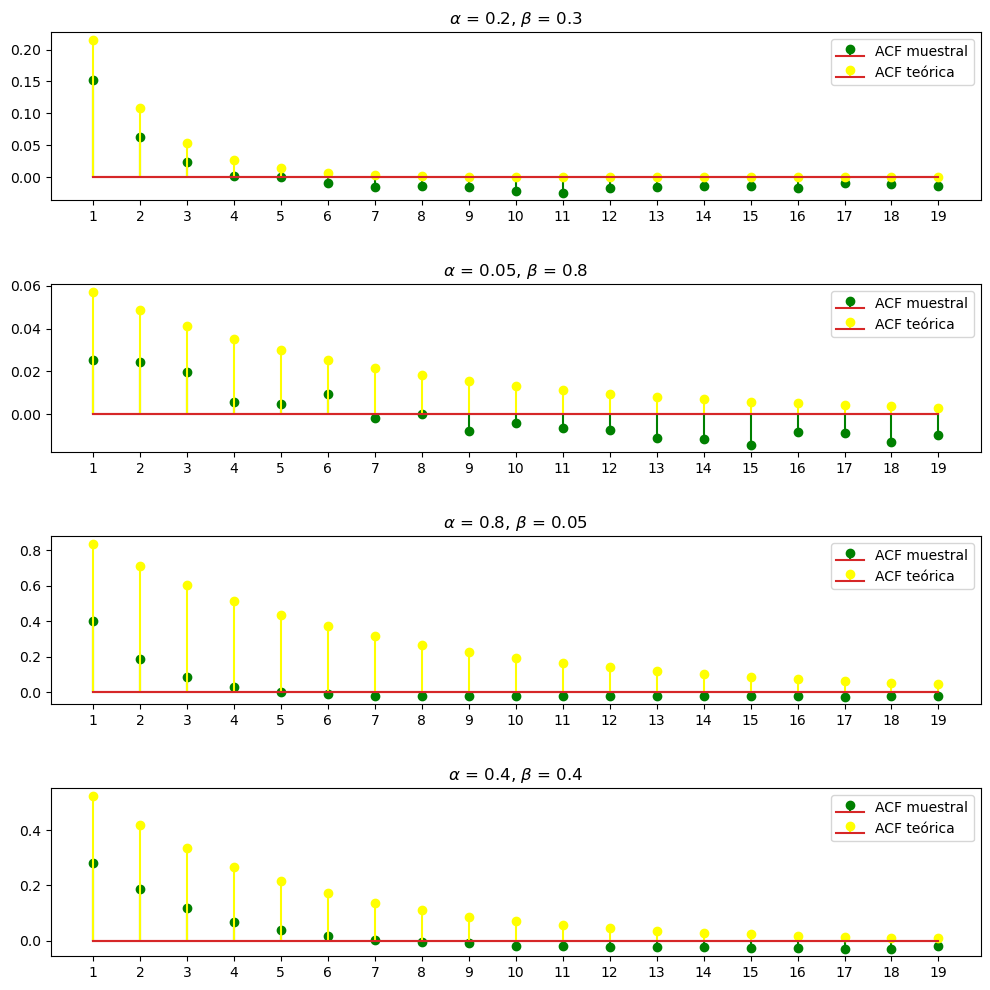

In [14]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

## n=1000 y m=1000

In [15]:
acf_m = []
acf_t = []
n=1000
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

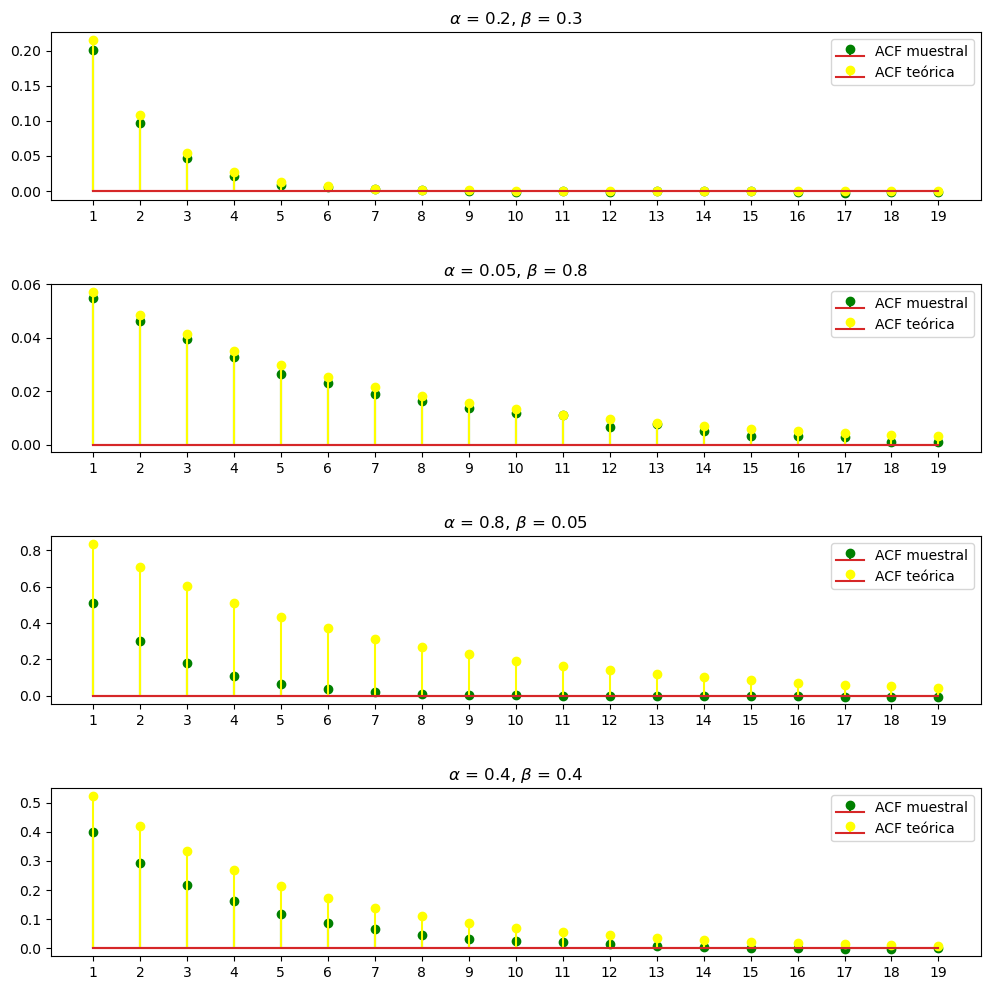

In [16]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

## n=1000 y m=10000

In [17]:
acf_m = []
acf_t = []
n=1000
m=10000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

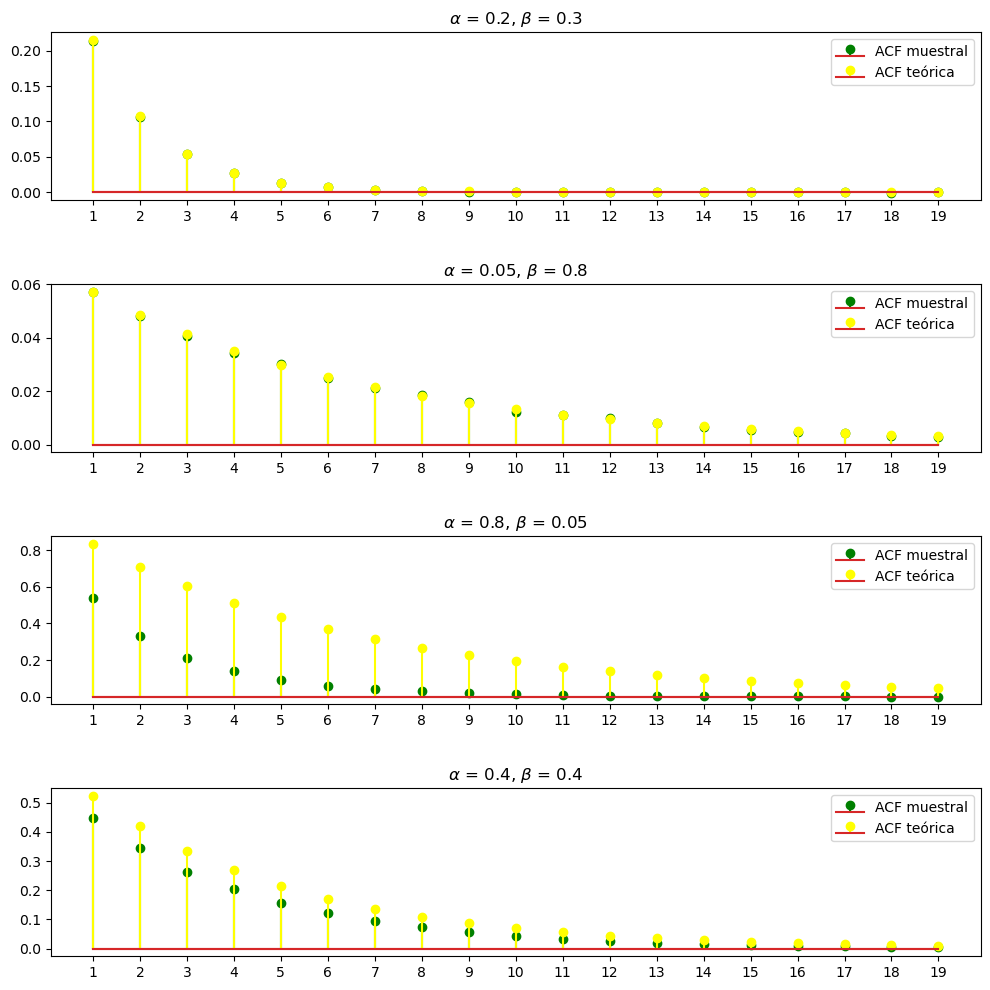

In [18]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

## n=1 y m=1000

In [19]:
acf_m = []
acf_t = []
n=1
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

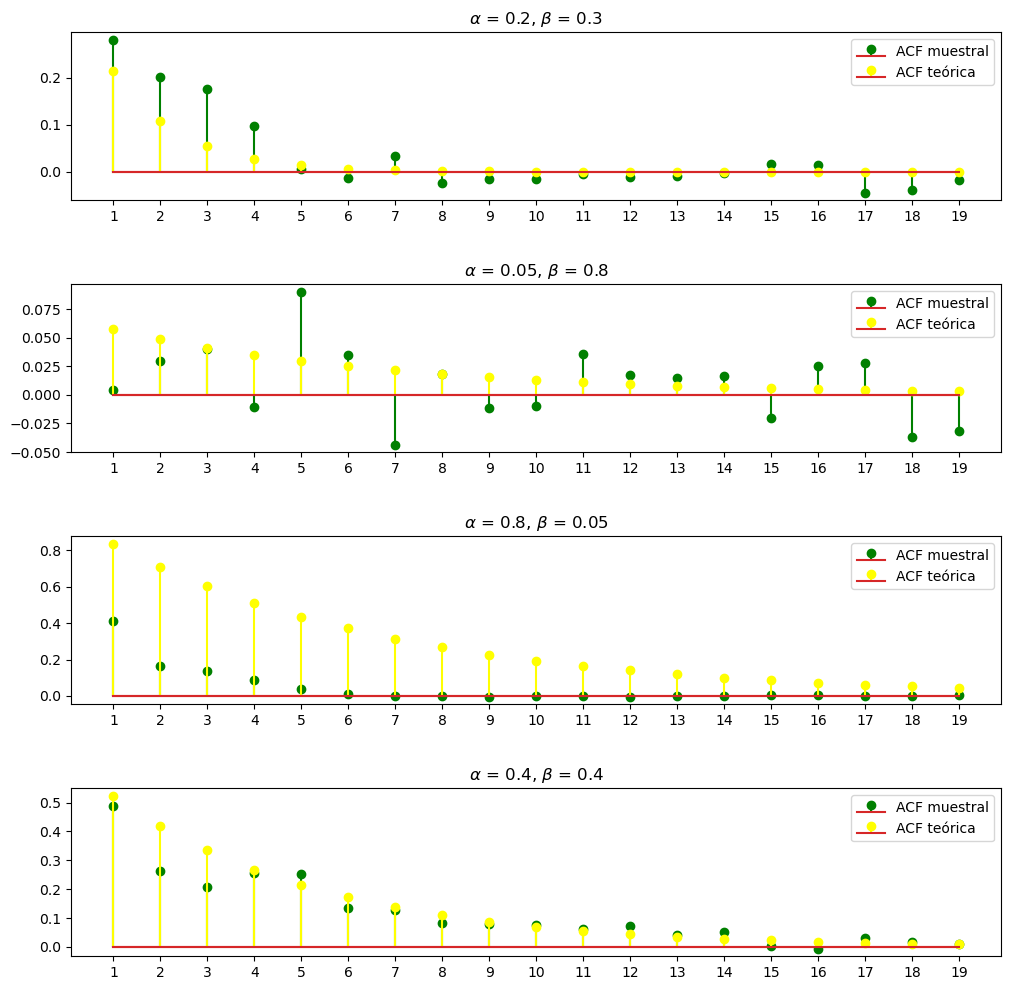

In [20]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

# n=1 y m = 10000

In [21]:
acf_m = []
acf_t = []
n=1
m=10000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

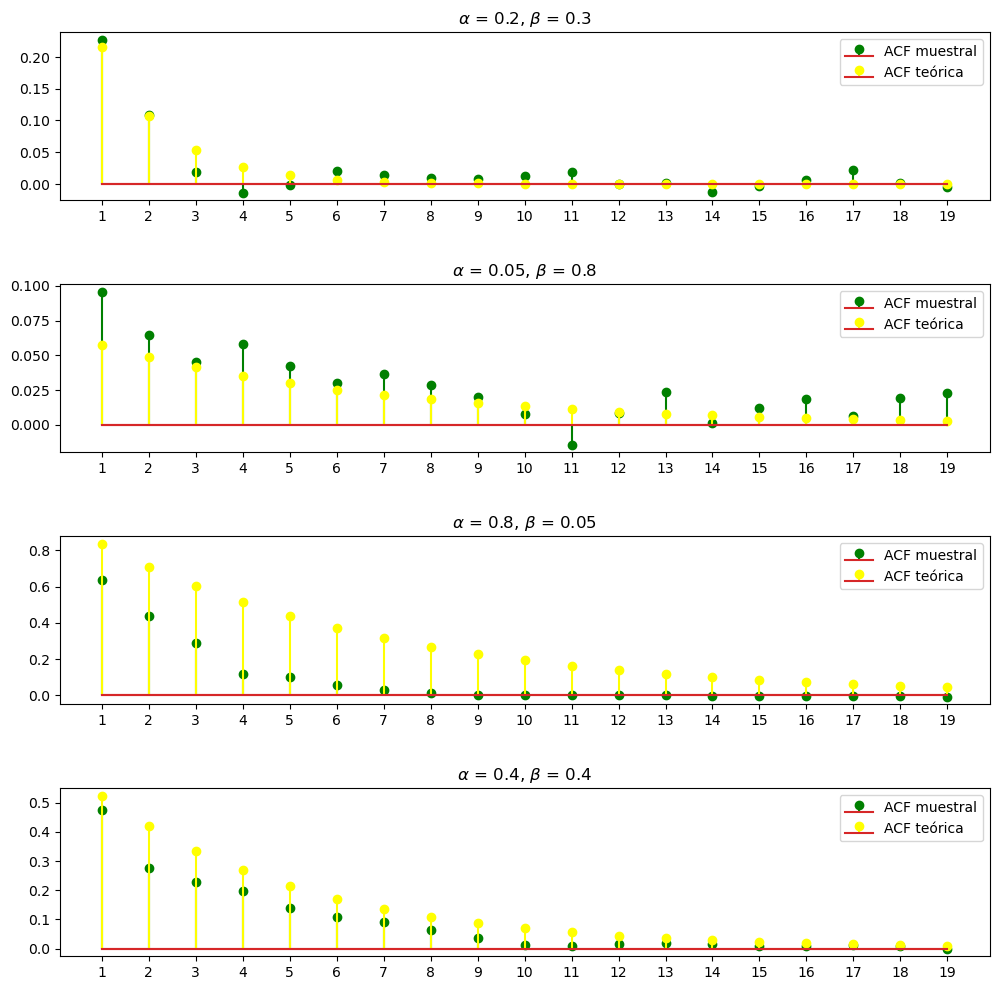

In [22]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

# n=1 y m = 100000

In [23]:
acf_m = []
acf_t = []
n=1
m=100_000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)


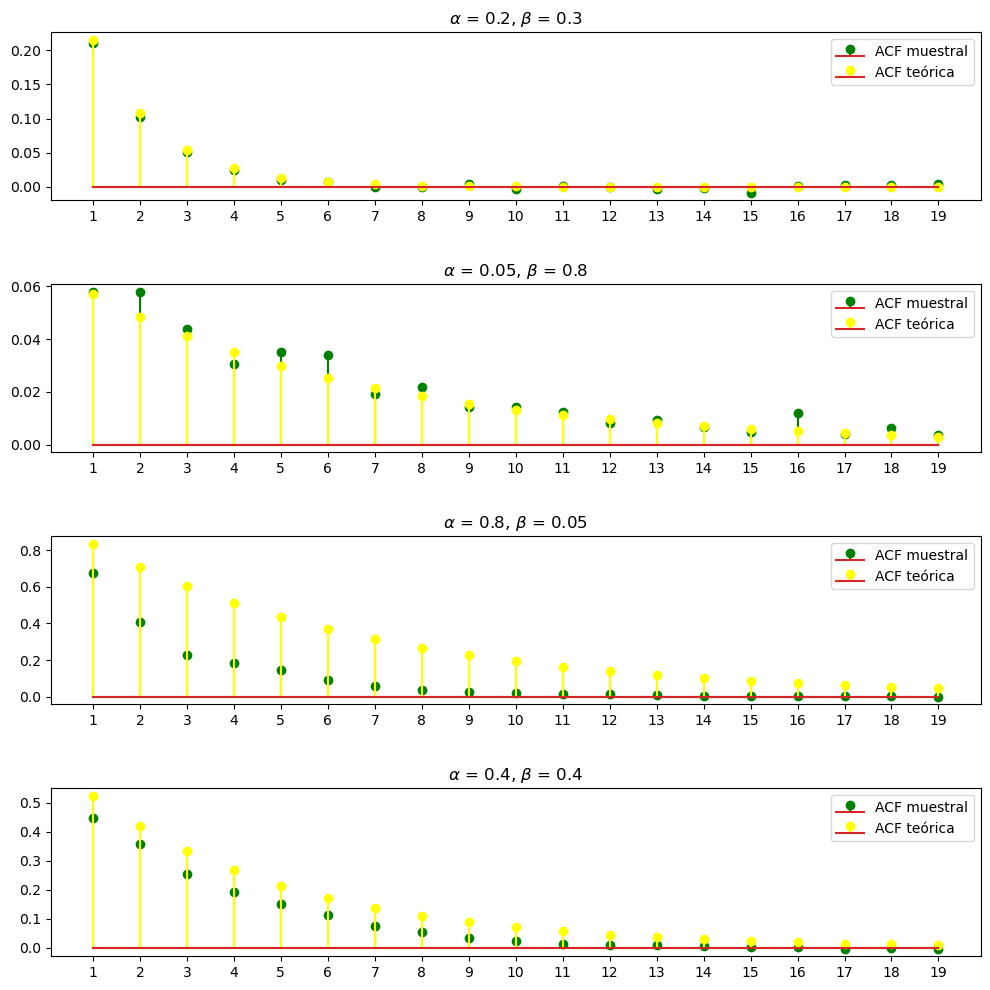

In [24]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1